In [45]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from mock_trade import MockTrade, Trade
from datetime import datetime
from backend import Backend
from frontend import Frontend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from logging_config import set_quiet_mode

set_quiet_mode()


In [47]:
START_DATE = '2019-12-01'
END_DATE = '2023-02-06'


In [48]:
buy_recipe(
    1000000,
    1,
    {
        "SPY": 0.5,
        "TLT": 0.25,
        "IAU": 0.1,
        "DBC": 0.15,
    },
    START_DATE
)

Adjusted weekend date 2019-12-01 to business day 2019-12-02
Buy Recipe for 2019-12-02 with $1000000.00 ($1000000 × 100.0%):
--------------------------------------------------
SPY: 1604 shares @ $311.64 = $499870.56 (50.0% allocation)
TLT: 1807 shares @ $138.31 = $249926.17 (25.0% allocation)
IAU: 3576 shares @ $27.96 = $99984.96 (10.0% allocation)
DBC: 9810 shares @ $15.29 = $149994.90 (15.0% allocation)
--------------------------------------------------
Total cost: $999776.59 of $1000000.00 allocated
Remaining cash: $223.41


Style 'seaborn-v0_8' not available, using default


Using MockTrade for portfolio simulation...
Calculated initial investment: $999869.53
Portfolio initialized with $999869.53 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2019-12-02   BUY    SPY      1925     $311.64    $599907.00   $399962.53   SPY:1925       

Current Holdings Summary:
----------------------------------------
SPY     :   1925 shares @ $  409.83 = $ 788922.75
----------------------------------------
Total   : $                 788922.75
Cash    : $                 399962.53
Portfolio: $                1188885.28
----------------------------------------
2   2019-12-02   BUY    TLT      1446     $138.31    $199996.26   $199966.27   TLT:1446       

Current Holdings Summary:
----------------------------------------
TLT     :   1446 shares @ $  105.91 = $ 

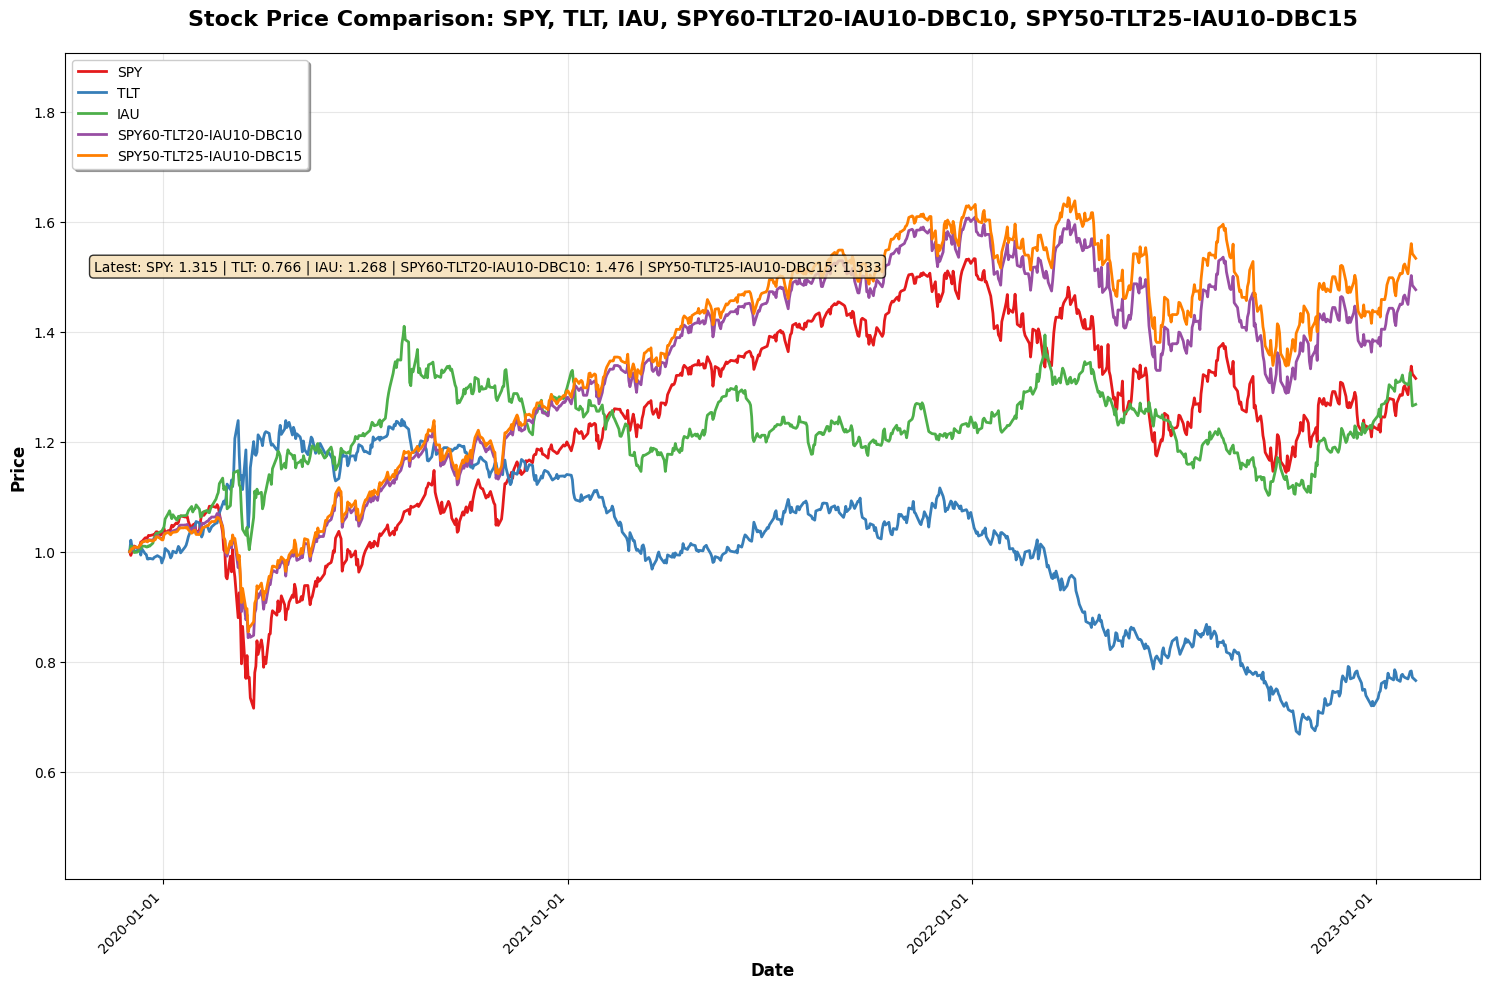

In [49]:
dfs = plot_prices(
    stocks=[
        StockConfig(symbol='SPY', normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
    ],
    portfolios=[
        Portfolio(
            name="SPY60-TLT20-IAU10-DBC10",
            trade_history=[
                Trade(symbol="SPY", volume=1925, date=START_DATE),
                Trade(symbol="TLT", volume=1446, date=START_DATE),
                Trade(symbol="IAU", volume=3576, date=START_DATE),
                Trade(symbol="DBC", volume=6539, date=START_DATE),
                Trade(symbol="TLT", volume=-1446, date='2020-04-20'),
                Trade(symbol="SPY", volume=INF, date='2020-04-21'),
                Trade(symbol="DBC", volume=-6540, date='2022-06-06'),
                Trade(symbol="SPY", volume=INF, date='2022-06-07'),
            ],
        ),
        Portfolio(
            name="SPY50-TLT25-IAU10-DBC15",
            trade_history=[
                Trade(symbol="SPY", volume=1604, date=START_DATE),
                Trade(symbol="TLT", volume=1807, date=START_DATE),
                Trade(symbol="IAU", volume=3576, date=START_DATE),
                Trade(symbol="DBC", volume=9807, date=START_DATE),
                Trade(symbol="TLT", volume=-1807, date='2020-04-20'),
                Trade(symbol="SPY", volume=INF, date='2020-04-21'),
                Trade(symbol="DBC", volume=-9807, date='2022-06-06'),
                Trade(symbol="SPY", volume=INF, date='2022-06-07'),
            ],
        ),
    ],
    # environments=MacroConfig(
    #     interest_rate=True,
    #     cpi=True,
    #     unemployment_rate=True,
    # ),
    start_date=START_DATE, end_date=END_DATE
)
